# 1. IMPORTAÇÃO DAS BIBLIOTECAS

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# 2. CARREGAMENTO E PRÉ-PROCESSAMENTO DOS DADOS

In [13]:
df = pd.read_csv('pima.csv', sep=';')
df.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [14]:
df.columns = [
    'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
    'BMI', 'DiabetesPedigreeFunction', 'Age', 'Diabetes'
]
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [15]:
# Substituir zeros por NaN em colunas onde zero não faz sentido
cols_with_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_missing] = df[cols_with_missing].replace(0, np.nan)

# Preencher com a mediana
df[cols_with_missing] = df[cols_with_missing].fillna(df[cols_with_missing].median())

# 3. ANÁLISE EXPLORATÓRIA

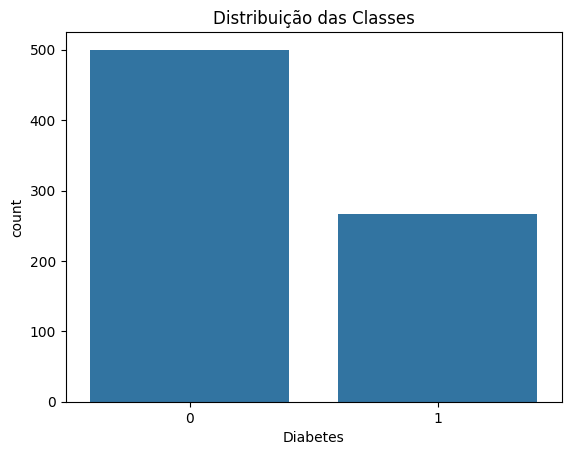

In [16]:
sns.countplot(x='Diabetes', data=df)
plt.title("Distribuição das Classes")
plt.show()

# 4. DIVISÃO ENTRE FEATURES E TARGET

In [17]:
X = df.drop('Diabetes', axis=1)
y = df['Diabetes']

# 5. NORMALIZAÇÃO

In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6. SEPARAÇÃO EM TREINO E TESTE

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# 7. DEFINIÇÃO DO MODELO BASE

In [20]:
mlp = MLPClassifier(max_iter=500, random_state=42)
mlp.fit(X_train, y_train)

/home/patrick/documents/projects/data_science/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=500, random_state=42)

Relatório de Classificação (Modelo Base):

              precision    recall  f1-score   support

           0       0.65      1.00      0.79       100
           1       0.00      0.00      0.00        54

    accuracy                           0.65       154
   macro avg       0.32      0.50      0.39       154
weighted avg       0.42      0.65      0.51       154



/home/patrick/documents/projects/data_science/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/patrick/documents/projects/data_science/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/patrick/documents/projects/data_science/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/patrick/documents/projects/data_science/.venv/l

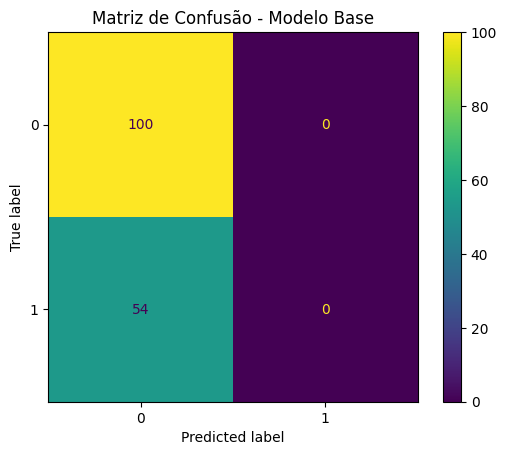

In [ ]:
y_pred = mlp.predict(X_test)
print("Relatório de Classificação (Modelo Base):\n")
print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_estimator(mlp, X_test, y_test)
plt.title("Matriz de Confusão - Modelo Base")
plt.show()

# 8. INVESTIGAÇÃO DE HIPERPARÂMETROS

/home/patrick/documents/projects/data_science/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/patrick/documents/projects/data_science/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/patrick/documents/projects/data_science/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/patrick/documents/projects/data_science/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum itera

Melhores parâmetros encontrados:
 {'alpha': 0.0001, 'hidden_layer_sizes': (10,), 'max_iter': 1000}

Melhor acurácia em validação cruzada: 76.67%

Relatório de Classificação (Melhor Modelo):

              precision    recall  f1-score   support

           0       0.65      1.00      0.79       100
           1       0.00      0.00      0.00        54

    accuracy                           0.65       154
   macro avg       0.32      0.50      0.39       154
weighted avg       0.42      0.65      0.51       154



/home/patrick/documents/projects/data_science/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/patrick/documents/projects/data_science/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/patrick/documents/projects/data_science/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

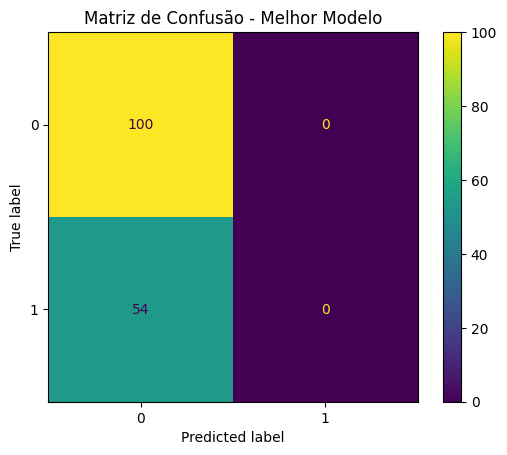

In [ ]:
param_grid = {
    'hidden_layer_sizes': [(10,), (50,), (100,), (50, 50), (100, 50), (100, 100)],
    'alpha': [0.0001, 0.001],
    'max_iter': [500, 1000]
}

grid = GridSearchCV(
    MLPClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Melhores parâmetros encontrados:\n", grid.best_params_)
print("\nMelhor acurácia em validação cruzada: {:.2f}%".format(grid.best_score_ * 100))

# Avaliação final no conjunto de teste
y_best = grid.predict(X_test)
print("\nRelatório de Classificação (Melhor Modelo):\n")
print(classification_report(y_test, y_best))

ConfusionMatrixDisplay.from_estimator(grid.best_estimator_, X_test, y_test)
plt.title("Matriz de Confusão - Melhor Modelo")
plt.show()